In [8]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
trial_data_df = pd.read_csv(clinical_trial_data)

drug_results_df = pd.merge(mouse_drug_df, trial_data_df, on=['Mouse ID'])

drug_results_df = drug_results_df.rename(columns={'Tumor Volume (mm3)': 'Volume'})  

drug_results_df = drug_results_df[drug_results_df['Drug'].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
drug_results_df.head(10)

,Mouse ID,Drug,Timepoint,Volume,Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
398,n923,Ketapril,10,48.791950,1
399,n923,Ketapril,15,51.738706,1
400,n923,Ketapril,20,52.599206,1
401,n923,Ketapril,25,56.855465,2
402,n923,Ketapril,30,59.632561,3


## Tumor Response to Treatment

In [9]:
drug_results_tumor_df = pd.DataFrame({'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint'], 
                                     'Volume' : drug_results_df['Volume']})

drug_results_grp = drug_results_tumor_df.groupby(['Drug', 'Timepoint'])
drug_results_grp.mean()

drug_tumor_sum_df = pd.DataFrame(drug_results_grp.mean().reset_index())
drug_tumor_sum_df.head(10)

drug_tumor_sum_df.columns = ['Drug', 'Timepoint', 'Average Volume']
drug_tumor_sum_df.head(10)

,Drug,Timepoint,Average Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [10]:
sem_drug = drug_tumor_sum_df.groupby('Drug').sem()

drug_results_grp = drug_results_tumor_df.groupby(['Drug', 'Timepoint']).sem()
drug_results_grp

drug_tumor_sem_df = pd.DataFrame(drug_results_grp.reset_index())
drug_tumor_sem_df.head(20)

drug_tumor_sem_df.columns = ['Drug', 'Timepoint', 'SEM Volume']
drug_tumor_sem_df.head(10)

,Drug,Timepoint,SEM Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [11]:
drug_tumor_avg_df = drug_tumor_sum_df.pivot(index='Timepoint', columns = 'Drug', values = 'Average Volume')
drug_tumor_avg_df

drug_tumor_sem_df = drug_tumor_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'SEM Volume')
drug_tumor_sem_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [12]:
#Capomulin
capo_means = drug_tumor_avg_df.loc[:, ['Capomulin']]
capo_means = capo_means['Capomulin']

capo_sem = drug_tumor_sem_df.loc[:, ['Capomulin']]
capo_sem = capo_sem['Capomulin']

#Infubinol
infub_means = drug_tumor_avg_df.loc[:, ['Infubinol']]
infub_means = infub_means['Infubinol']

infub_sem = drug_tumor_sem_df.loc[:, ['Infubinol']]
infub_sem = infub_sem['Infubinol']

#Ketapril
keta_means = drug_tumor_avg_df.loc[:, ['Ketapril']]
keta_means = keta_means['Ketapril']

keta_sem = drug_tumor_sem_df.loc[:, ['Ketapril']]
keta_sem = keta_sem['Ketapril']

#Placebo
placebo_means = drug_tumor_avg_df.loc[:, ['Placebo']]
placebo_means = placebo_means['Placebo']

placebo_sem = drug_tumor_sem_df.loc[:, ['Placebo']]
placebo_sem = placebo_sem['Placebo']

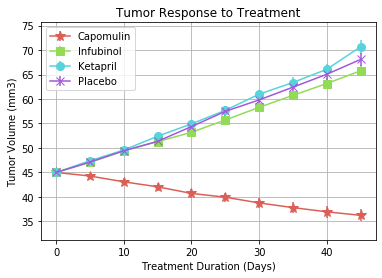

In [13]:
# Generate the Plot (with Error Bars)

#Get min and max values for the avg tumor volume so we set limits on the plot
min_volume = drug_tumor_sum_df.min()['Average Volume']
max_volume = drug_tumor_sum_df.max()['Average Volume']

min_volume = min_volume - 5
max_volume = max_volume + 5

current_palette_4 = sns.color_palette("hls", 4)
sns.set_palette(current_palette_4)

plt.grid(True)
plt.ylim(min_volume, max_volume)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Tumor Response to Treatment")

time = list(drug_tumor_avg_df.index.values)

#Plot Capomulin
plt.errorbar(time, capo_means, capo_sem, marker = "*", ms = 10, label = "Capomulin")

#Plot Infubinol
plt.errorbar(time, infub_means, infub_sem, marker = "s", ms = 8, label = "Infubinol")

#Plot Ketapril
plt.errorbar(time, keta_means, keta_sem, marker = "o", ms= 8, label = "Ketapril")

#Plot Placebo
plt.errorbar(time, placebo_means, placebo_sem, marker = "x", ms= 8, label = "Placebo")

plt.legend(frameon=True)

plt.savefig('Tumor Response.png') 

## Metastatic Response to Treatment

In [16]:
drug_results_met_df = pd.DataFrame({'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint'], 
                                     'Metastatic Sites' : drug_results_df['Metastatic Sites']})

drug_mets_grp = drug_results_met_df.groupby(['Drug', 'Timepoint'])
drug_mets_grp.mean()

drug_met_avg_df = pd.DataFrame(drug_mets_grp.mean().reset_index())
#drug_met_avg_df.head(20)

drug_met_avg_df.columns = ['Drug', 'Timepoint', 'Average Met Sites']
drug_met_avg_df.head(10)

min_mets = drug_met_avg_df.min()['Average Met Sites']
max_mets = drug_met_avg_df.max()['Average Met Sites']

In [17]:

met_sem_grp = drug_results_met_df.groupby(['Drug', 'Timepoint']).sem()

drug_mets_sem_df = pd.DataFrame(met_sem_grp.reset_index())
drug_mets_sem_df.head(20)

drug_mets_sem_df.columns = ['Drug', 'Timepoint', 'SEM Met Sites']
drug_mets_sem_df.head(20)

,Drug,Timepoint,SEM Met Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [18]:
drug_met_avg_df = drug_met_avg_df.pivot(index='Timepoint', columns = 'Drug', values = 'Average Met Sites')
drug_met_avg_df.head(10)

drug_mets_sem_df = drug_mets_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'SEM Met Sites')
drug_mets_sem_df.head(10)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [19]:
#Capomulin
capo_met_means = drug_met_avg_df.loc[:, ['Capomulin']]
capo_met_means = capo_met_means['Capomulin']

capo_met_sem = drug_mets_sem_df.loc[:, ['Capomulin']]
capo_met_sem = capo_met_sem['Capomulin']

#Infubinol
infub_met_means = drug_met_avg_df.loc[:, ['Infubinol']]
infub_met_means = infub_met_means['Infubinol']

infub_met_sem = drug_mets_sem_df.loc[:, ['Infubinol']]
infub_met_sem = infub_met_sem['Infubinol']

#Ketapril
keta_met_means = drug_met_avg_df.loc[:, ['Ketapril']]
keta_met_means = keta_met_means['Ketapril']

keta_met_sem = drug_mets_sem_df.loc[:, ['Ketapril']]
keta_met_sem = keta_met_sem['Ketapril']

#Placebo
placebo_met_means = drug_met_avg_df.loc[:, ['Placebo']]
placebo_met_means = placebo_met_means['Placebo']

placebo_met_sem = drug_mets_sem_df.loc[:, ['Placebo']]
placebo_met_sem = placebo_met_sem['Placebo']
placebo_met_sem

Timepoint
0     0.000000
5     0.100947
10    0.115261
15    0.190221
20    0.234064
25    0.263888
30    0.300264
35    0.341412
40    0.297294
45    0.304240
Name: Placebo, dtype: float64

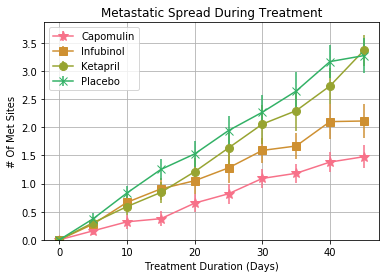

In [20]:

current_palette_8 = sns.color_palette("husl", 8)
sns.set_palette(current_palette_8)

max_mets = max_mets + 0.5

plt.grid(True)
plt.ylim(min_mets, max_mets)
plt.ylabel("# Of Met Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")

time = list(drug_met_avg_df.index.values)

#Plot Capomulin
plt.errorbar(time, capo_met_means, capo_met_sem, marker = "*", ms = 10, label = "Capomulin")

#Plot Infubinol
plt.errorbar(time, infub_met_means, infub_met_sem, marker = "s", ms = 8, label = "Infubinol")

#Plot Ketapril
plt.errorbar(time, keta_met_means, keta_met_sem, marker = "o", ms = 8, label = "Ketapril")

#Plot Placebo
plt.errorbar(time, placebo_met_means, placebo_met_sem, marker = "x", ms = 8, label = "Placebo")

plt.legend(frameon=True)

plt.savefig('Metastatic Spread.png') 

plt.show()

## Survival Rates

In [21]:
drug_results_survival_df = pd.DataFrame({'Mice' : drug_results_df['Mouse ID'],
                                         'Drug' : drug_results_df['Drug'], 'Timepoint' : drug_results_df['Timepoint']})
drug_results_survival_df.head()

data_mice_count = drug_results_survival_df.groupby(['Drug', 'Timepoint'])

survival_count_df = pd.DataFrame(data_mice_count.count().reset_index())

survival_count_df = survival_count_df.rename(columns={'Mice' : '# of Surviving Mice'})
survival_count_df.head()

,Drug,Timepoint,# of Surviving Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
survival_percent_df = pd.DataFrame({"Drug" : survival_count_df['Drug'], "Timepoint": survival_count_df['Timepoint'],
                                    "Survival %" : (survival_count_df['# of Surviving Mice'] / 25) * 100})
survival_percent_df.head()

,Drug,Timepoint,Survival %
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [23]:
survival_percent_df = survival_percent_df.pivot(index='Timepoint', columns = 'Drug', values = 'Survival %')

survival_percent_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


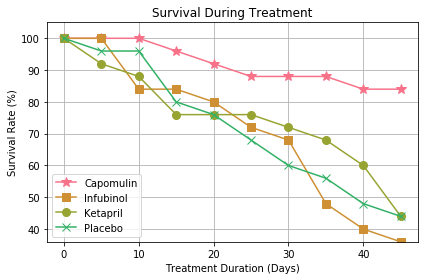

In [24]:
current_palette_8 = sns.color_palette("husl", 8)
sns.set_palette(current_palette_8)

min_survival_percent = survival_percent_df.min()
min_survival_percent = min_survival_percent.min()

min_rate = min_survival_percent - 12

x_axis = list(survival_percent_df.index.values)

capo_survival_percent = survival_percent_df.loc[:, ['Capomulin']]
infub_survival_percent = survival_percent_df.loc[:, ['Infubinol']]
keta_survival_percent = survival_percent_df.loc[:, ['Ketapril']]
placebo_survival_percent = survival_percent_df.loc[:, ['Placebo']]

plt.grid(True)
plt.ylim(min_survival_percent, 105)
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Survival During Treatment")
plt.plot(x_axis, capo_survival_percent, marker = "*", ms = 10, label = "Capomulin")
plt.plot(x_axis, infub_survival_percent, marker = "s", ms = 8, label = "Infubinol")
plt.plot(x_axis, keta_survival_percent, marker = "o", ms = 8, label = "Ketapril")
plt.plot(x_axis, placebo_survival_percent, marker = "x", ms = 8, label = "Placebo")

plt.legend(frameon=True)
plt.tight_layout()

plt.savefig('Survival Rates.png') 

plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()